In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from time import time
import datetime
import warnings

In [221]:
df=pd.read_excel('C://Users//LENOVO//Desktop//Internship//BiStartX//datasets//yahoo_data.xlsx')

In [222]:
df.head(10)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000
5,"Apr 21, 2023",33793.60,33858.83,33688.57,33808.96,33808.96,291080000
6,"Apr 20, 2023",33740.60,33875.39,33677.74,33786.62,33786.62,307910000
7,"Apr 19, 2023",33889.83,33957.98,33814.65,33897.01,33897.01,251490000
8,"Apr 18, 2023",33965.16,34018.62,33791.89,33976.63,33976.63,253570000
9,"Apr 17, 2023",33930.46,33991.23,33796.91,33987.18,33987.18,234530000


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1258 non-null   object 
 1   Open         1258 non-null   float64
 2   High         1258 non-null   float64
 3   Low          1258 non-null   float64
 4   Close*       1258 non-null   float64
 5   Adj Close**  1258 non-null   float64
 6   Volume       1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [224]:
df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64

In [225]:
# Rename column 'Close*' to 'Close' and 'Adj close**' to 'Adj_Close'
df.rename(columns={'Adj Close**': 'Adj_Close'}, inplace=True)
df.drop(columns=['Close*'],inplace=True)

In [226]:
df.head(5)

,Date,Open,High,Low,Adj_Close,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,252020000


In [228]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Adj_Close', 'Volume'], dtype='object')


In [231]:
# Ensure 'Date' is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Sort from oldest to newest
df = df.sort_values('Date')

# Set Date as index (optional but recommended for time series)
df.set_index('Date', inplace=True)

In [232]:
# Ensure the index is datetime and sorted
df.index = pd.to_datetime(df.index)
data = df.sort_index()


In [233]:
data.head(5)

,Open,High,Low,Adj_Close,Volume
Date,,,,,
2018-05-01,24117.29,24117.29,23808.19,24099.05,380070000
2018-05-02,24097.63,24185.52,23886.30,23924.98,385350000
2018-05-03,23836.23,23996.15,23531.31,23930.15,389240000
2018-05-04,23865.22,24333.35,23778.87,24262.51,329480000
2018-05-07,24317.66,24479.45,24263.42,24357.32,307670000


In [234]:
#Using 'Adj_Close' as target column
data = df['Adj_Close'].dropna()

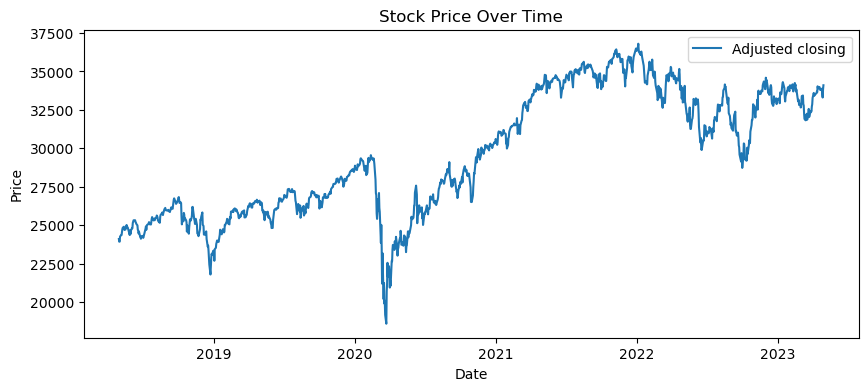

In [235]:
#plot the stock prices
plt.figure(figsize=(10,4))
plt.plot(data, label='Adjusted closing')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

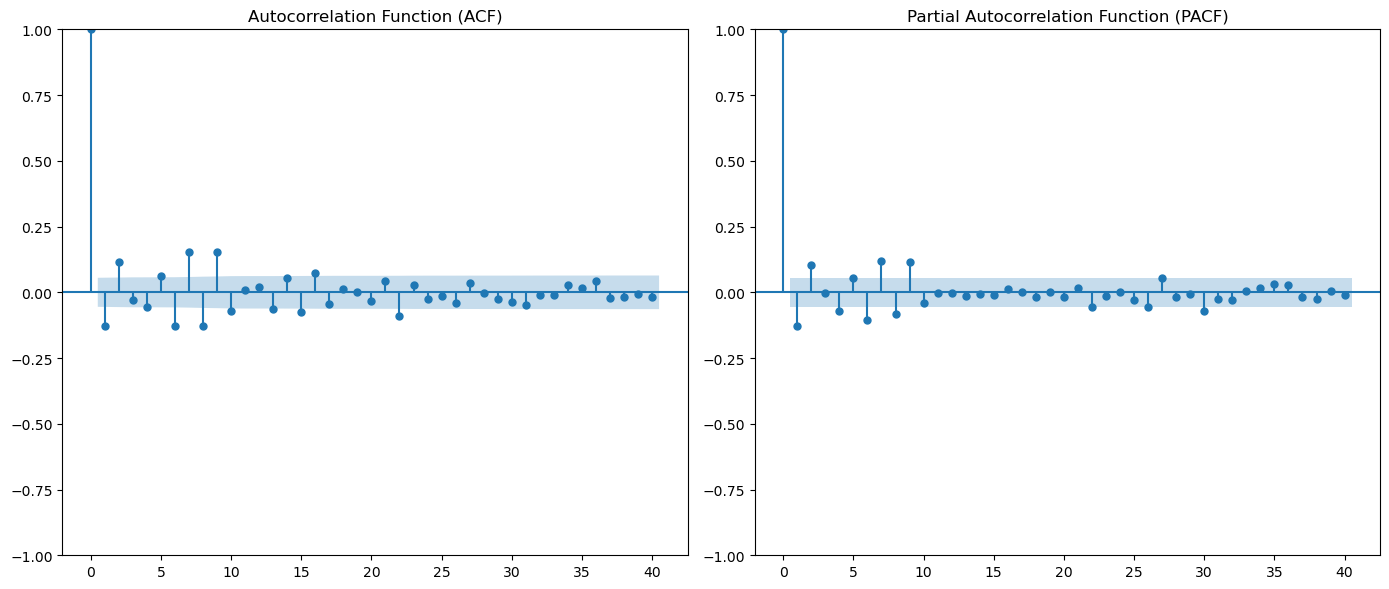

In [236]:
 # Differencing to make data stationary (d=1)
data_diff = data.diff().dropna()

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(data_diff, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(data_diff, lags=40, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [265]:
# Fit ARIMA(1,1,1) model
model = ARIMA(data, order=(5, 1, 8))
model_fit = model.fit()

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [266]:
# Model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj_Close   No. Observations:                 1258
Model:                 ARIMA(5, 1, 8)   Log Likelihood               -9130.883
Date:                Tue, 13 May 2025   AIC                          18289.766
Time:                        22:05:58   BIC                          18361.677
Sample:                             0   HQIC                         18316.792
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9423      0.253     -3.718      0.000      -1.439      -0.446
ar.L2          0.5462      0.080      6.793      0.000       0.389       0.704
ar.L3          0.1954      0.189      1.036      0.3

In [267]:
n_steps = 30  # or any number depending on your test window

# Forecast the next n values
forecast = model_fit.forecast(steps=n_steps)

# Get the actual last n values to compare with
actual = data[-n_steps:]

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [268]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Convert to numpy arrays (if needed)
y_true = actual.values if hasattr(actual, 'values') else actual
y_pred = forecast.values if hasattr(forecast, 'values') else forecast

# Metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


MAE: 866.46
MSE: 1228064.66
RMSE: 1108.18
R² Score: -1.5554


ModuleNotFoundError: No module named 'pmdarima'

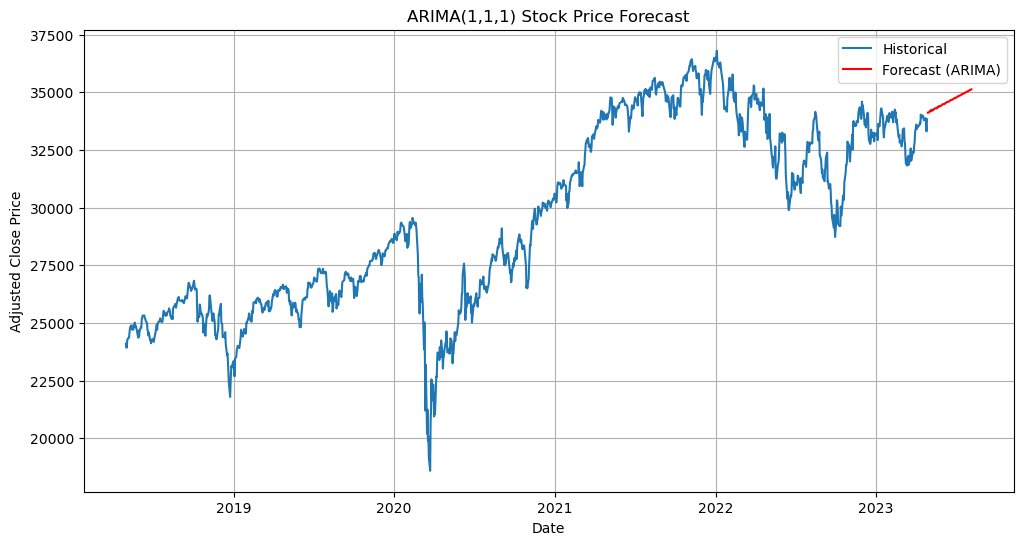

In [246]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data[:-1], label='Historical')  # last 100 values for context
plt.plot(forecast_df['Forecast'], label='Forecast (ARIMA)', color='red')
plt.title('ARIMA(1,1,1) Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [135]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Use only the target column
data = df['Adj Close**'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)